## Student Engagement
Here we will explore the data on student engagement

In [7]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import import_ipynb
from Student_info import country_Student
from Student_info import student_info
from collections import Counter
import collections

In [8]:
student_engagement = pd.read_csv('dataSets/365_database/365_student_engagement.csv')
student_engagement.head()

,engagement_id,student_id,engagement_quizzes,engagement_exams,engagement_lessons,date_engaged
0,1,274999,1,1,1,2022-05-27
1,3,274501,0,0,1,2022-05-27
2,4,272842,1,1,1,2022-05-27
3,8,275173,0,0,1,2022-05-27
4,11,274876,0,1,0,2022-05-27


In [10]:
dates = pd.DataFrame(student_engagement['date_engaged'].value_counts())
dates.head()
# engagement_dates = student_engagement['date_engaged'].value_counts()
# engagement_dates.to_excel('dates_engaged')

,date_engaged
2022-08-16,808
2022-08-15,807
2022-08-17,749
2022-08-18,585
2022-10-10,402


### Date of engagement
- The above dataframe contains dates which appear in the student engagement dataframe.

- They are listed in descending order of engagement (i.e) The top most date is when most engagement happened, second date - second most and so on.


In [11]:
students = pd.DataFrame(student_engagement['student_id'].value_counts())
students

student_engagement['date_engaged'].value_counts().to_dict()


{'2022-08-16': 808,
 '2022-08-15': 807,
 '2022-08-17': 749,
 '2022-08-18': 585,
 '2022-10-10': 402,
 '2022-10-06': 396,
 '2022-10-13': 386,
 '2022-10-04': 377,
 '2022-10-19': 376,
 '2022-10-12': 374,
 '2022-10-18': 371,
 '2022-10-03': 371,
 '2022-10-05': 371,
 '2022-10-20': 362,
 '2022-10-11': 362,
 '2022-10-14': 360,
 '2022-10-17': 344,
 '2022-09-26': 341,
 '2022-09-30': 341,
 '2022-06-02': 339,
 '2022-10-07': 338,
 '2022-09-20': 334,
 '2022-10-02': 331,
 '2022-09-19': 325,
 '2022-08-11': 323,
 '2022-08-02': 320,
 '2022-09-21': 313,
 '2022-08-19': 313,
 '2022-08-23': 313,
 '2022-09-27': 312,
 '2022-08-22': 311,
 '2022-09-29': 308,
 '2022-10-08': 306,
 '2022-09-23': 306,
 '2022-08-24': 305,
 '2022-08-01': 301,
 '2022-09-22': 299,
 '2022-08-09': 297,
 '2022-08-30': 297,
 '2022-10-16': 295,
 '2022-09-28': 293,
 '2022-07-26': 293,
 '2022-08-25': 289,
 '2022-08-10': 288,
 '2022-08-04': 286,
 '2022-08-08': 285,
 '2022-07-27': 284,
 '2022-09-15': 280,
 '2022-08-03': 280,
 '2022-10-09': 280,


### Student Engagement
- The above dataframe contains students who appear in the student engagement dataframe.

- They are listed in descending order of engagement (i.e) The top most student has engaged the most, second top - second most and so on.


In [12]:
missing_country_df = student_info[student_info.isnull().any(axis=1)]
missing_country = missing_country_df['student_id'].tolist()
missing_country

[261725,
 262665,
 272144,
 278827,
 282654,
 282914,
 283704,
 283791,
 284550,
 284790,
 286959,
 290648,
 293967]

In [13]:
df = student_engagement.copy()

df_cleaned = df[~df['student_id'].isin(missing_country)]
student_engagement_cleaned = df_cleaned.reset_index(drop=True)
(student_engagement_cleaned)

,engagement_id,student_id,engagement_quizzes,engagement_exams,engagement_lessons,date_engaged
0,1,274999,1,1,1,2022-05-27
1,3,274501,0,0,1,2022-05-27
2,4,272842,1,1,1,2022-05-27
3,8,275173,0,0,1,2022-05-27
4,11,274876,0,1,0,2022-05-27
...,...,...,...,...,...,...
65320,2649439,295185,0,0,1,2022-10-20
65321,2649446,282935,0,1,1,2022-10-20
65322,2649658,292048,0,0,1,2022-10-20
65323,2649818,295443,0,0,1,2022-10-20


In [14]:
country = []
i = 0
n = len(student_engagement_cleaned)-1

while (i<=n):
    x=student_engagement_cleaned['student_id'].loc[i]
    y=country_Student[x]
    country.append(y)
    i=i+1

In [15]:
len(country)
df_country = pd.DataFrame(country,columns = ['country'])
df_country

,country
0,TH
1,US
2,IN
3,NP
4,PK
...,...
65320,AR
65321,BR
65322,CA
65323,GB


In [56]:
top_5_countries = student_info['student_country'].value_counts().head()
top_5_countries

IN    6933
US    4768
EG    3003
GB    1748
NG    1718
Name: student_country, dtype: int64

In [17]:
frames = [student_engagement_cleaned, df_country]

student_engagement_by_country = pd.concat(frames,axis = 1)

student_engagement_by_country

,engagement_id,student_id,engagement_quizzes,engagement_exams,engagement_lessons,date_engaged,country
0,1,274999,1,1,1,2022-05-27,TH
1,3,274501,0,0,1,2022-05-27,US
2,4,272842,1,1,1,2022-05-27,IN
3,8,275173,0,0,1,2022-05-27,NP
4,11,274876,0,1,0,2022-05-27,PK
...,...,...,...,...,...,...,...
65320,2649439,295185,0,0,1,2022-10-20,AR
65321,2649446,282935,0,1,1,2022-10-20,BR
65322,2649658,292048,0,0,1,2022-10-20,CA
65323,2649818,295443,0,0,1,2022-10-20,GB


In [77]:
India = student_engagement_by_country[student_engagement_by_country['country'] == 'IN']
pd.DataFrame(India['student_id'].value_counts())

,student_id
268287,108
263087,88
258818,77
265101,76
262112,73
...,...
273586,1
273643,1
273646,1
273648,1


In [63]:
US = student_engagement_by_country[student_engagement_by_country['country'] == 'US']
pd.DataFrame(US['student_id'].value_counts())

260173    130
260754    121
268926    121
266512    107
271326    104
         ... 
273469      1
273459      1
273354      1
273344      1
295420      1
Name: student_id, Length: 2607, dtype: int64

In [64]:
EG = student_engagement_by_country[student_engagement_by_country['country'] == 'EG']
pd.DataFrame(EG['student_id'].value_counts())

259860    69
278875    56
278851    48
277562    46
261239    45
          ..
276440     1
275883     1
276417     1
276406     1
295509     1
Name: student_id, Length: 1489, dtype: int64

In [64]:
EG = student_engagement_by_country[student_engagement_by_country['country'] == 'EG']
EG['student_id'].value_counts()

259860    69
278875    56
278851    48
277562    46
261239    45
          ..
276440     1
275883     1
276417     1
276406     1
295509     1
Name: student_id, Length: 1489, dtype: int64

In [65]:
GB = student_engagement_by_country[student_engagement_by_country['country'] == 'GB']
GB['student_id'].value_counts()

261785    112
266001    100
276439     88
277864     78
275277     77
         ... 
276759      1
276687      1
277094      1
277160      1
295443      1
Name: student_id, Length: 848, dtype: int64

In [76]:
NG = student_engagement_by_country[student_engagement_by_country['country'] == 'NG']
x = NG['student_id'].value_counts()
x.iloc['0']

TypeError: Cannot index by location index with a non-integer key

In [18]:
student_ID_frequency = student_engagement_by_country['student_id'].value_counts()

ID_frequency = pd.DataFrame(student_ID_frequency).reset_index().rename(columns={"index": "student_id", "student_id": "frequency"})

ID_frequency

,student_id,frequency
0,269204,155
1,261682,139
2,264131,134
3,261905,133
4,260173,130
...,...,...
18330,262169,1
18331,272362,1
18332,279869,1
18333,280075,1


In [52]:
x = ID_frequency['frequency'].value_counts()
x.to_excel('engagement_frequency.xlsx')

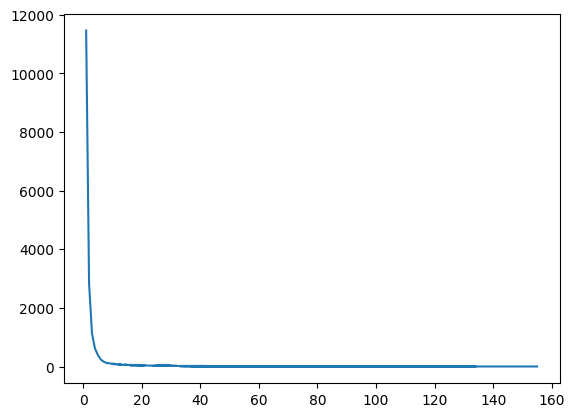

In [47]:
plt.plot(x)

In [22]:
average_engagement = int(ID_frequency['frequency'].mean())
average_engagement

3

The above variable is an int representing the average level of engagement among students

In [21]:
above_avg = ID_frequency[ID_frequency['frequency']>=average_engagement].reset_index(drop=True)
below_avg = ID_frequency[ID_frequency['frequency']<average_engagement].reset_index(drop=True)
above_avg

,student_id,frequency
0,269204,155
1,261682,139
2,264131,134
3,261905,133
4,260173,130
...,...,...
4031,282183,3
4032,287369,3
4033,281362,3
4034,295250,3


We have now created two dataframe depicting student ID and engagement frequencies

They are above_avg and below_avg, the titles are pretty self-explanatory.

From this the student_engagement_cleaned dataframe could be split in two to study the nationality representation.

In [22]:
above_avg_student_id = above_avg['student_id'].tolist()
below_avg_student_id = below_avg['student_id'].tolist() 
print(above_avg_student_id[:10])
print(below_avg_student_id[:10])


[269204, 261682, 264131, 261905, 260173, 261466, 267064, 262569, 260465, 260754]
[267606, 293427, 293444, 270379, 293107, 269253, 293122, 278726, 269251, 282454]


In [23]:
above_avg_engagement = student_engagement_by_country[student_engagement_by_country['student_id'].isin(above_avg_student_id)].reset_index(drop = True)
above_avg_engagement

,engagement_id,student_id,engagement_quizzes,engagement_exams,engagement_lessons,date_engaged,country
0,1,274999,1,1,1,2022-05-27,TH
1,3,274501,0,0,1,2022-05-27,US
2,4,272842,1,1,1,2022-05-27,IN
3,8,275173,0,0,1,2022-05-27,NP
4,11,274876,0,1,0,2022-05-27,PK
...,...,...,...,...,...,...,...
48188,2649021,273630,0,0,1,2022-10-20,US
48189,2649283,292757,0,0,1,2022-10-20,EG
48190,2649446,282935,0,1,1,2022-10-20,BR
48191,2649658,292048,0,0,1,2022-10-20,CA


The above DF contains information on students with above average level of engagement activity

In [24]:
below_avg_engagement = student_engagement_by_country[student_engagement_by_country['student_id'].isin(below_avg_student_id)].reset_index(drop = True)
(below_avg_engagement)

,engagement_id,student_id,engagement_quizzes,engagement_exams,engagement_lessons,date_engaged,country
0,319,259098,1,0,1,2022-05-27,IN
1,513,275178,0,0,1,2022-05-27,EG
2,562,274919,0,1,1,2022-05-27,TR
3,699,275180,1,1,1,2022-05-27,ID
4,893,275184,0,0,1,2022-05-27,GB
...,...,...,...,...,...,...,...
17127,2649150,295512,1,0,1,2022-10-20,CA
17128,2649152,281652,0,0,1,2022-10-20,ID
17129,2649377,293992,0,0,1,2022-10-20,GB
17130,2649439,295185,0,0,1,2022-10-20,AR


The above DF contains information on students with below average level of engagement activity

Next step is understanding the nationality representation in these DataFrames discounting the repetition of student IDs.

For that purpose, <mark> drop_duplicates() </mark> function will be used to remove duplicate rows based on the country column.

In [25]:
print(len(above_avg_engagement['student_id'].value_counts()))
print(len(below_avg_engagement['student_id'].value_counts()))

4036
14299


In [26]:
above_avg_students = above_avg_engagement.drop_duplicates(subset = ['student_id']).reset_index(drop =True)
below_avg_students = below_avg_engagement.drop_duplicates(subset = ['student_id']).reset_index(drop =True)

# The above lines of codes frame data on engagement without repetition in the student ID.
# This is useful -seen below- in extracting data to represent nationality based on engagement.

above_avg_countries = above_avg_students['country'].value_counts().to_dict()
below_avg_countries = below_avg_students['country'].value_counts().to_dict()

# The dictionaries described above will be exported to different notebooks to be further utilized.

len(above_avg_countries)
len(below_avg_countries)



169

In [27]:
above_avg_ID = above_avg_engagement['student_id'].value_counts().to_dict()
below_avg_ID = below_avg_engagement['student_id'].value_counts().to_dict()
print(len(above_avg_ID))
print(len(below_avg_ID))

4036
14299


In [30]:
student_engagement_by_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65325 entries, 0 to 65324
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   engagement_id       65325 non-null  int64 
 1   student_id          65325 non-null  int64 
 2   engagement_quizzes  65325 non-null  int64 
 3   engagement_exams    65325 non-null  int64 
 4   engagement_lessons  65325 non-null  int64 
 5   date_engaged        65325 non-null  object
 6   country             65325 non-null  object
dtypes: int64(5), object(2)
memory usage: 3.5+ MB


In [29]:
engagement_dates = student_engagement_by_country['date_engaged'].value_counts().to_dict()
engagement_dates_ordered = collections.OrderedDict(sorted(engagement_dates.items()))
engagement_dates_ordered

OrderedDict([('2022-01-01', 55),
             ('2022-01-02', 75),
             ('2022-01-03', 90),
             ('2022-01-04', 85),
             ('2022-01-05', 88),
             ('2022-01-06', 97),
             ('2022-01-07', 85),
             ('2022-01-08', 96),
             ('2022-01-09', 84),
             ('2022-01-10', 99),
             ('2022-01-11', 110),
             ('2022-01-12', 117),
             ('2022-01-13', 120),
             ('2022-01-14', 109),
             ('2022-01-15', 93),
             ('2022-01-16', 91),
             ('2022-01-17', 141),
             ('2022-01-18', 122),
             ('2022-01-19', 128),
             ('2022-01-20', 145),
             ('2022-01-21', 138),
             ('2022-01-22', 103),
             ('2022-01-23', 109),
             ('2022-01-24', 157),
             ('2022-01-25', 149),
             ('2022-01-26', 175),
             ('2022-01-27', 165),
             ('2022-01-28', 157),
             ('2022-01-29', 127),
             ('2022-01-30'

<function matplotlib.pyplot.show(close=None, block=None)>

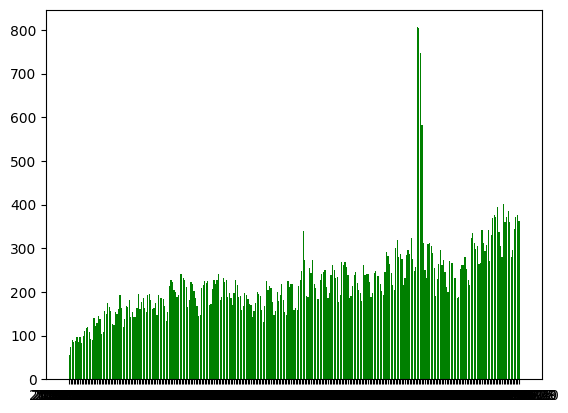

In [28]:
plt.bar(list(engagement_dates_ordered.keys()),engagement_dates_ordered.values(),color='g')
plt.show  

# The End 

This may be the end of all essential fuctions in this notebook.

I may return to tinker. But for now, this is it. 

Good riddance

# Deprecated

<mark> Below are some unnecessarily complicated methods I wasted some time on. But found enough sense and abandoned. I'm keeping this around as a reminder</mark>

Number of unique Student IDs in the engagement data.

From the above two cells it is clear that there are numerous repeated values in the Student ID column.

Some students must be engaging on the platform repetitively.

I will use the Counter() function from the collection package to create a dict with Student ID as the key and the number of times they occur as the value.

From that the average of instances of engagement could be calculated which help narrow the student population to study (most engaged).

#### Update

The same result can be achieved by applying the <mark>value_counts()</mark> on the 'student_id' column of the original dataframe.

I will comment the code but keep them to remind myself when I look through this in the future.


In [70]:
# l = student_engagement_by_country['student_id'].tolist()
# ID_occurrence = Counter(l)
# len(ID_occurrence)

<mark> ID_occurence </mark> from the above cell contains the dict containing Student IDs as keys and their frequency of occurence as the values.

This dict could be converted to a data frame to study the statistical distribution.

In [71]:
# student_engagement_frequency = pd.DataFrame.from_dict(ID_occurrence,orient ='index' ).reset_index().rename(columns={"index": "student_id", 0: "frequency"})

# student_engagement_frequency

From the DF above we can study the distribution of engagement.